<a href="https://colab.research.google.com/github/LimKyeongmuk/CNN-Architecture/blob/main/VGG16_transfer_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('./MyDrive')

Mounted at ./MyDrive


In [20]:
cd /content/MyDrive/MyDrive/Colab Notebooks/learningSpoons/git/

/content/MyDrive/MyDrive/Colab Notebooks/learningSpoons/git


In [29]:
import keras,os
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from keras.preprocessing.image import ImageDataGenerator
import numpy as np

In [24]:
trdata = ImageDataGenerator()
traindata = trdata.flow_from_directory(directory="./dogsandcats",target_size=(224,224))
tdata = ImageDataGenerator()
testdata = tdata.flow_from_directory(directory="./dogsandcats",target_size=(224,224))

Found 84 images belonging to 2 classes.
Found 84 images belonging to 2 classes.


Transfer Learning

 https://github.com/tensorflow/tensorflow/blob/v2.3.1/tensorflow/python/keras/applications/vgg16.py#L45-L225

 https://www.tensorflow.org/api_docs/python/tf/keras/applications/VGG16

In [30]:
VGG = keras.applications.vgg16.VGG16(input_shape=(224,224,3), include_top = False, weights = 'imagenet')
VGG.trainable = False

58900480/58889256 [==============================] - 1s 0us/step


In [31]:
VGG.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

VGG Architecture

In [32]:
model = Sequential()

model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Flatten())
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=2, activation="softmax"))


VGG + Classifier

In [33]:
model = Sequential()
model.add(VGG)
model.add(Flatten())
model.add(Dense(units=256,activation="relu"))
model.add(Dense(units=256,activation="relu"))
model.add(Dense(units=2, activation="softmax"))

In [36]:
from keras.optimizers import adam_v2

model.compile(optimizer='adam', loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [37]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               6422784   
_________________________________________________________________
dense_4 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 514       
Total params: 21,203,778
Trainable params: 6,489,090
Non-trainable params: 14,714,688
_________________________________________________________________


In [38]:
history = model.fit(traindata, epochs = 10)

Epoch 1/10
3/3 [==============================] - 49s 5s/step - loss: 8.5914 - accuracy: 0.6190
Epoch 2/10
3/3 [==============================] - 1s 240ms/step - loss: 13.7958 - accuracy: 0.8452
Epoch 3/10
3/3 [==============================] - 1s 223ms/step - loss: 0.7846 - accuracy: 0.9524
Epoch 4/10
3/3 [==============================] - 1s 221ms/step - loss: 4.5128e-07 - accuracy: 1.0000
Epoch 5/10
3/3 [==============================] - 1s 224ms/step - loss: 4.8251e-08 - accuracy: 1.0000
Epoch 6/10
3/3 [==============================] - 1s 226ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 7/10
3/3 [==============================] - 1s 235ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 8/10
3/3 [==============================] - 1s 235ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 9/10
3/3 [==============================] - 1s 232ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 10/10
3/3 [==============================] - 1s 220ms/step - loss: 0.0000e+00 - accuracy:

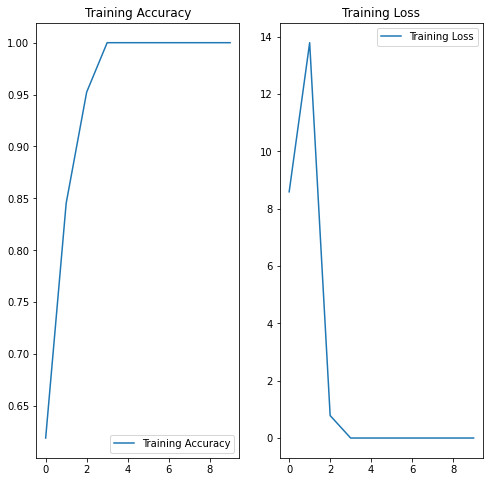

In [39]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']

loss = history.history['loss']

epochs_range = range(10)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.legend(loc='lower right')
plt.title('Training Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.legend(loc='upper right')
plt.title('Training Loss')
plt.show()